In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  

# <font color='Blue'>Prevendo Vendas de Champagne</font>

![](https://c.tenor.com/qt3f5BpeVnwAAAAC/champagne-gif.gif)


In [2]:
df = pd.read_csv('Champagne3.csv',index_col ='Month',parse_dates = True)

In [4]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
df.isnull().sum()

Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

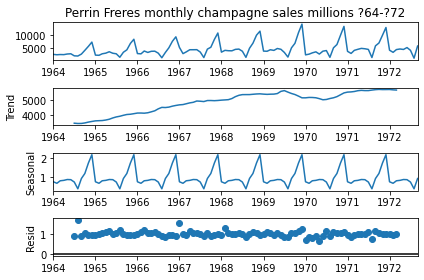

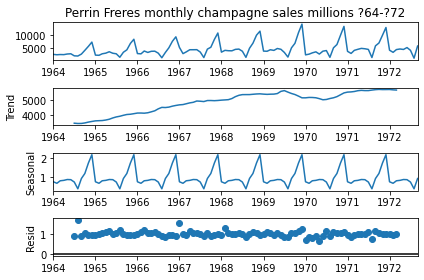

In [6]:
# ETS Decomposition
result = seasonal_decompose(df['Perrin Freres monthly champagne sales millions ?64-?72'], model ='multiplicative')
  
# ETS plot 
result.plot()

In [7]:
from pmdarima import auto_arima

In [8]:
import warnings
warnings.filterwarnings("ignore")
  

In [9]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Perrin Freres monthly champagne sales millions ?64-?72'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1501.191, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.27 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.26 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.58 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.46 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.23 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.54 sec
 ARIMA(0,0,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Tue, 27 Sep 2022   AIC                           1498.167
Time:                                     13:02:05   BIC                           1508.297
Sample:                                 01-01-1964   HQIC                          1502.257
                                      - 09-01-1972                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8388    100.620      3.606      0.000     165.627     560.050
ma.L1          0.2191      0.074      2.970      0.003       0.075       0.364
ar.S.L12      -0.1784      0.082     -2.186      0.029      -0.338      -0.018
sigma2      5.135e+05   5.75e+04      8.924      0.000    4.01e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.55   Prob(JB):                         0.02
Heteroskedasticity (H):               1.27   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 0, 1)x(1, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Perrin Freres monthly champagne sales millions ?64-?72'], 
                order = (0, 0, 1), 
                seasonal_order =(1, 1, 0, 12))
  
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08739D+00    |proj g|=  6.91294D-02

At iterate    5    f=  7.08528D+00    |proj g|=  1.42434D-04

At iterate   10    f=  7.08523D+00    |proj g|=  8.10861D-03

At iterate   15    f=  7.08416D+00    |proj g|=  1.99452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   9.491D-07   7.084D+00
  F =   7.0838904834448382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   93
Model:                                    SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -658.802
Date:                                                    Tue, 27 Sep 2022   AIC                           1323.604
Time:                                                            13:11:47   BIC                           1330.787
Sample:                                                        01-01-1964   HQIC                          1326.486
                                                             - 09-01-1971                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2631      0.091      2.887      0.004       0.084       0.442
ar.S.L12      -0.0654      0.088     -0.743      0.458      -0.238       0.107
sigma2      6.639e+05   8.97e+04      7.401      0.000    4.88e+05     8.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 7.33
Prob(Q):                              0.76   Prob(JB):                         0.03
Heteroskedasticity (H):               1.75   Skew:                            -0.29
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

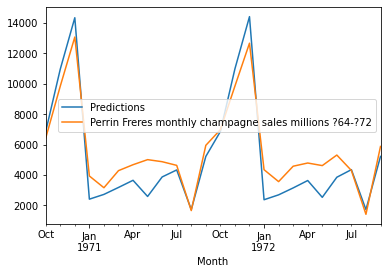

In [19]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Perrin Freres monthly champagne sales millions ?64-?72'].plot(legend = True)

In [12]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [13]:
# Calculate root mean squared error
rmse(test["Perrin Freres monthly champagne sales millions ?64-?72"], predictions)

337.5666508605957

In [14]:
# Calculate mean squared error
mean_squared_error(test["Perrin Freres monthly champagne sales millions ?64-?72"], predictions)

113951.24377323932

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15499D+00    |proj g|=  4.19210D-02

At iterate    5    f=  7.15428D+00    |proj g|=  1.90285D-04

At iterate   10    f=  7.15424D+00    |proj g|=  7.07515D-03

At iterate   15    f=  7.15324D+00    |proj g|=  1.11920D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   6.161D-06   7.153D+00
  F =   7.1531735511512338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<AxesSubplot:xlabel='Month'>

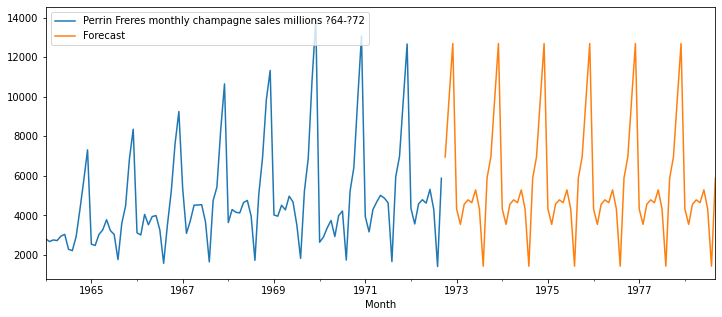

In [17]:
# Train the model on the full dataset
model = model = SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'], 
                        order = (0, 0, 1), 
                        seasonal_order =(1, 1, 0, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 6 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['Perrin Freres monthly champagne sales millions ?64-?72'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)